# Proyek Analisis Data: Nama dataset
- Nama:Alifi Lazuardi Gunawan
- Email:alifilg4@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca memengaruhi tingkat penyewaan sepeda?
- Bagaimana perbedaan penyewaan sepeda pada saat workday dan weekend/holiday?
- Bagaiana perkembangan jumlah penyewaan sepeda dari tahun ke tahun?

## Menyaipkan semua library yang dibuthkan

In [ ]:
!pip install -q opendatasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
od.download('https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alifilazuardi
Your Kaggle Key: ··········


100%|██████████| 286k/286k [00:00<00:00, 49.9MB/s]

In [ ]:
data = pd.read_csv('/content/bike-sharing-dataset/day.csv')

memastikan data telah diimport

In [ ]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


mengecek missing value data

In [ ]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

berdasarkan pengecekan di atas, tidak terdapat missing value di dalam data

mengecek data duplikat

In [ ]:
print('Jumlah data duplikat dalam data: ', data.duplicated().sum())

Jumlah data duplikat dalam data:  0


berdasarkan pengecekan, tidak terdapat data duplikat

mengecek outlier

In [ ]:
def find_outliers(df, columns):
    outliers = pd.DataFrame()

    for column in columns:
        # Calculate the IQR for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Append the outliers to the result DataFrame
        outliers = pd.concat([outliers, column_outliers])

    return outliers

In [ ]:
outliers_df = find_outliers(data, ['cnt'])

# Display the DataFrame containing outliers
print("Outliers:")
outliers_df

Outliers:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


tidak terdapat data outliers

### Cleaning Data

mengubah dteday menjadi date

In [ ]:
data['dteday'] = pd.to_datetime(data['dteday'], infer_datetime_format=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

In [ ]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Explore

mencari rata-rata penyewa pada berbagai kondisi cuaca

In [ ]:
penyewa_by_cuaca = data.groupby('weathersit', as_index = False)['cnt'].mean()

penyewa_by_cuaca

,weathersit,cnt
0,1,4876.786177
1,2,4035.862348
2,3,1803.285714


mencari rata-rata penyewa weekend dan working day

In [ ]:
penyewa_by_day = data.groupby('workingday',as_index = False)['cnt'].mean()

penyewa_by_day

,workingday,cnt
0,0,4330.168831
1,1,4584.820000


mencari pengguna terdaftar dan pengguna casual

In [ ]:
tipe_penyewa = data.groupby('workingday',as_index = False)[['registered', 'casual']].sum()
tipe_penyewa

,workingday,registered,casual
0,0,683537,316732
1,1,1989125,303285


mencari trend pengguna sepeda berdasarkan bulan

In [ ]:
year_month = data['dteday'].dt.to_period('M')
year_month

0      2011-01
1      2011-01
2      2011-01
3      2011-01
4      2011-01
        ...   
726    2012-12
727    2012-12
728    2012-12
729    2012-12
730    2012-12
Name: dteday, Length: 731, dtype: period[M]

menambahkan kolom bulan dan tahun

In [ ]:
data['year_month'] = year_month
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_month
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012-12
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012-12
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012-12
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012-12


menyimpan data

In [ ]:
saved = data.to_csv('data_ready.csv')

In [ ]:
penyewa_by_month = data.groupby('year_month',as_index = False)['cnt'].sum()

penyewa_by_month['year_month'] = penyewa_by_month['year_month'].astype(str)

In [ ]:
penyewa_by_month

,year_month,cnt
0,2011-01-01,38189
1,2011-02-01,48215
2,2011-03-01,64045
3,2011-04-01,94870
4,2011-05-01,135821
5,2011-06-01,143512
6,2011-07-01,141341
7,2011-08-01,136691
8,2011-09-01,127418
9,2011-10-01,123511


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca memengaruhi tingkat penyewaan sepeda?

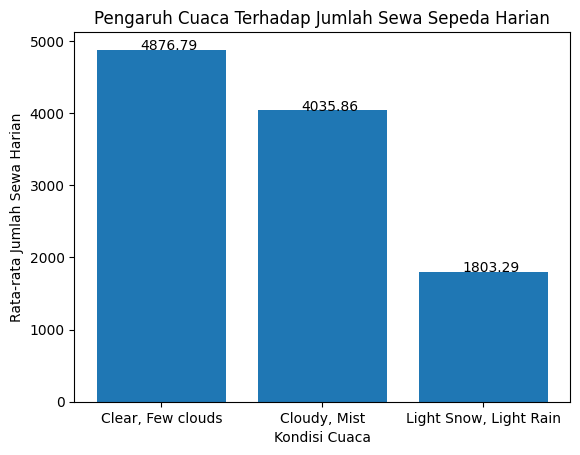

In [ ]:
season_names = ['Clear, Few clouds', 'Cloudy, Mist', 'Light Snow, Light Rain']

fig, ax = plt.subplots()
bars = ax.bar(season_names, penyewa_by_cuaca['cnt'])

plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.title('Pengaruh Cuaca Terhadap Jumlah Sewa Sepeda Harian')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3, yval, round(yval, 2))
plt.show()

### Pertanyaan 2: Bagaimana perbedaan penyewaan sepeda pada saat workday dan weekend/holiday?

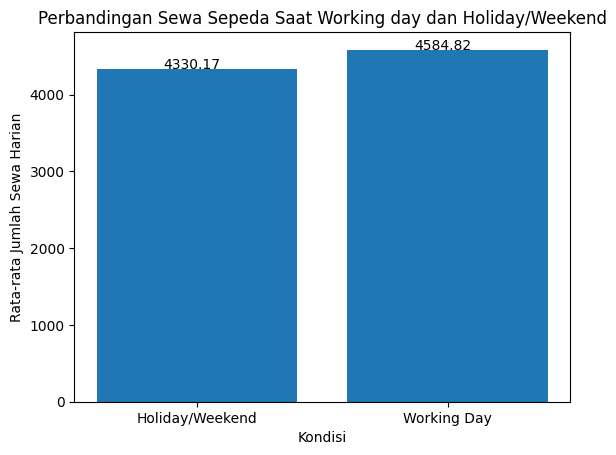

In [ ]:
day = ['Holiday/Weekend', 'Working Day']
fig, ax = plt.subplots()
bars = ax.bar(day, penyewa_by_day['cnt'])

plt.xlabel('Kondisi')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.title('Perbandingan Sewa Sepeda Saat Working day dan Holiday/Weekend')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3, yval, round(yval, 2))
plt.show()

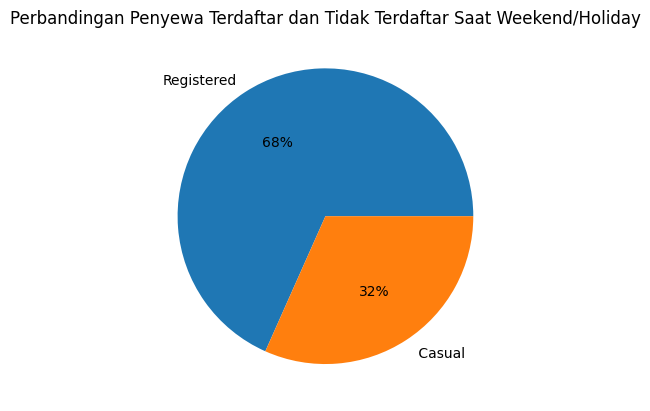

In [ ]:
plt.pie([tipe_penyewa['registered'][0], tipe_penyewa['casual'][0] ], labels = ['Registered', ' Casual'], autopct='%1.0f%%')
plt.title('Perbandingan Penyewa Terdaftar dan Tidak Terdaftar Saat Weekend/Holiday')
plt.show()

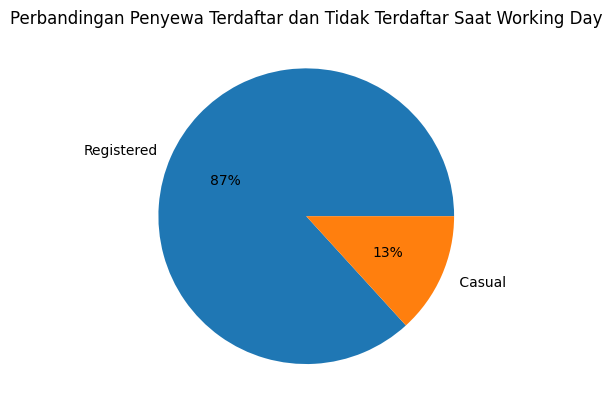

In [ ]:
plt.pie([tipe_penyewa['registered'][1], tipe_penyewa['casual'][1] ], labels = ['Registered', ' Casual'], autopct='%1.0f%%')
plt.title('Perbandingan Penyewa Terdaftar dan Tidak Terdaftar Saat Working Day')
plt.show()

### Pertanyaan 3: Bagaiana perkembangan jumlah penyewaan sepeda dari tahun ke tahun?

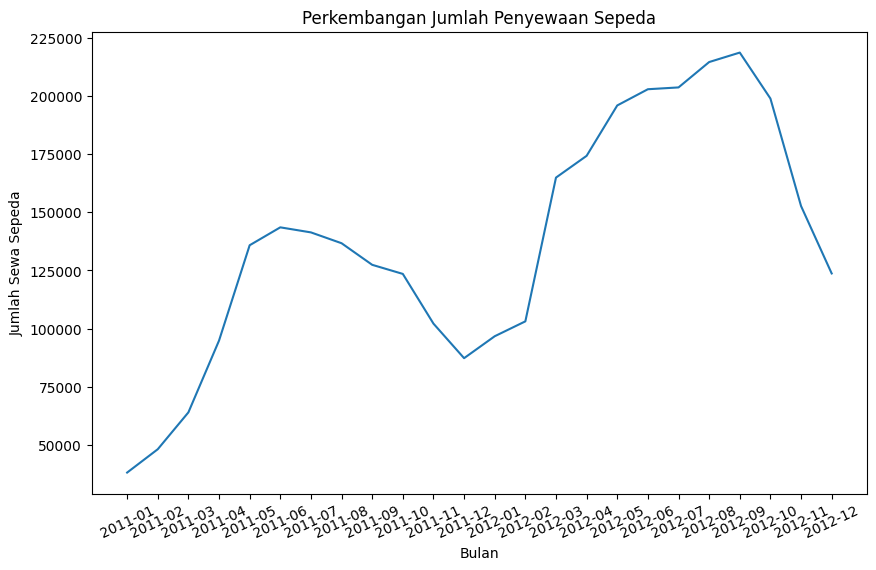

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(penyewa_by_month['year_month'], penyewa_by_month['cnt'])
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sewa Sepeda')
plt.xticks(rotation = 25)
plt.title('Perkembangan Jumlah Penyewaan Sepeda')

plt.show()

## Conclusion

- Conclution pertanyaan 1

  Berdasarkan grafik yang dibuat mengenai pengaruh cuaca memperlihatkan bahwa cuaca mempunyai pengeruh terhadap tingkat penyewaan sepeda. Rata-rata penyewaan sepeda paling tinggi terjadi ketika cuaca sedang carah dan sedikit berawan. Ketika cuaca berawan terjadi penurunan rata-rata penyewaan sepeda. Ketika cuaca sedang hujan atau bersalju, tingkat penyewaan sepeda mengalami penurunan drastis.

- Conclution pertanyaan 2

  Tingkat penyewaan sepeda lebih banyak terjadi saat working day. Hal ini didasarkan pada rata-rata penyewaan sepeda saat working day yang lebih tinggi dengan selisih 200-an sepeda. Lebih dalam lagi penyewa sepeda saat working day 87% adalah pengguna yang terdaftar, sedangkan pada saat weekend/holiday persentase pengguna terdaftar adalah 68%. Hal ini menunjukkan adanya peningkatan pengguna casual pada saat holiday/weekend.

- Conclution pertanyaan 3

  Berdasarkan grafik yang dibuat, perkembangan penyewaan sepeda mengalami peningkatan yang cukup besar dari bulan Januari 2011 sampai dengan Desember 2012. Dalam grafik sendiri terjadi fluktuasi penyewaan tiap bulannya yang kemungkinan diakibatkan oleh musim yang berbeda. Namun secara umum terjadi kenaikan penyewaan sepeda dari bulan Januari 2011 sampai dengan bulan Desember 2012.